In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, HuberRegressor, ARDRegression, PoissonRegressor, RANSACRegressor, TweedieRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df = pd.read_csv('housing_train.csv')
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.000,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.423,-86.707,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.000,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.376,-86.805,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.500,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.423,-86.707,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.000,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.423,-86.707,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.000,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.423,-86.707,al


In [5]:
df.shape

(265190, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [7]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,265190.000,265190.000,265190.000,265190.000,265190.000,265190.000,265190.000,265190.000,265190.000,265190.000,265190.000,263771.000,263771.000
mean,7040888428.840,12272.854,1093.678,1.912,1.483,0.717,0.697,0.734,0.079,0.014,0.049,37.209,-92.398
std,8778929.710,5376351.716,23068.876,3.692,0.630,0.451,0.460,0.442,0.269,0.119,0.215,5.660,17.371
min,7003808130.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-43.533,-163.894
25%,7035963170.000,817.000,752.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,33.508,-104.704
50%,7043108598.000,1060.000,950.000,2.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,37.985,-86.478
75%,7048361724.750,1450.000,1156.000,2.000,2.000,1.000,1.000,1.000,0.000,0.000,0.000,41.168,-81.285
max,7051263014.000,2768307249.000,8388607.000,1100.000,75.000,1.000,1.000,1.000,1.000,1.000,1.000,102.036,172.633


In [8]:
df.isnull().sum() 

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64

## Removal of unnecessary columns

In [9]:
df.drop(['id','url','region_url','description','image_url'],axis=1,inplace=True)

## Imputation of missing values

In [10]:
df['laundry_options'].fillna(df['laundry_options'].mode()[0],inplace=True)
df['parking_options'].fillna(df['parking_options'].mode()[0],inplace=True)
df['state'].fillna(df['state'].mode()[0],inplace=True)
df['lat'].fillna(df['lat'].mean(),inplace=True)
df['long'].fillna(df['long'].mean(),inplace=True)

In [11]:
df.isna().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

In [12]:
df[df.duplicated()]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
12,birmingham,1120,apartment,1319,3,2.000,1,1,1,0,0,0,laundry on site,off-street parking,33.376,-86.805,al
19,birmingham,1195,apartment,1908,3,2.000,1,1,1,0,0,0,laundry on site,street parking,33.423,-86.707,al
24,birmingham,925,apartment,1350,2,2.000,1,1,1,0,0,0,laundry on site,street parking,33.423,-86.707,al
25,birmingham,785,apartment,1047,2,1.000,1,1,1,0,0,0,laundry on site,street parking,33.423,-86.707,al
27,birmingham,1120,apartment,1319,3,2.000,1,1,1,0,0,0,laundry on site,off-street parking,33.376,-86.805,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265163,columbus,1060,apartment,949,2,2.000,0,0,1,0,0,0,w/d in unit,off-street parking,40.115,-82.910,oh
265179,columbus,760,apartment,794,1,1.000,1,1,1,1,0,0,w/d hookups,detached garage,39.966,-83.153,oh
265183,columbus,870,apartment,933,2,2.000,1,1,1,0,0,0,w/d hookups,street parking,39.897,-82.896,oh
265184,columbus,929,apartment,728,1,1.000,1,1,1,1,0,0,w/d in unit,off-street parking,39.971,-82.924,oh


Text(0.5, 1.0, 'Price distribution of various types of houses')

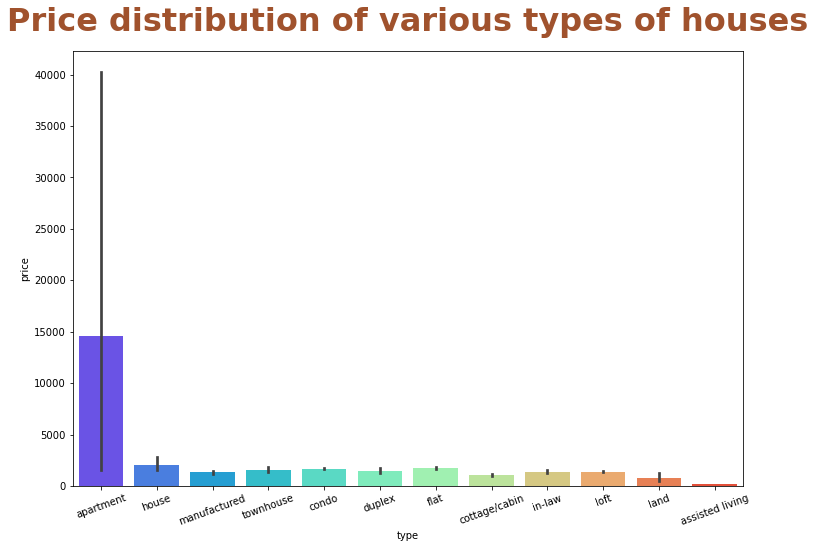

In [13]:
sns.barplot(x='type',y='price',data=df,palette='rainbow')
plt.xticks(rotation=20)
plt.title('Price distribution of various types of houses',fontsize=32,fontweight='bold',color='sienna',pad=20)

Apartments have the most exorbitant prices amongst all types of houses. 

Text(0.5, 1.0, 'Proportion of Laundry Options')

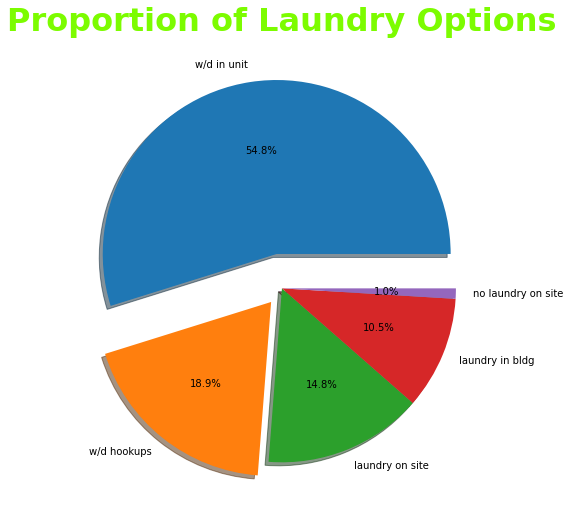

In [14]:
values = df['laundry_options'].value_counts().values
labels = df['laundry_options'].value_counts().keys()
explode = (0.2,0.1,0,0,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of Laundry Options',color='lawngreen',fontsize=32,fontweight='bold',pad=40)

Washer/Drier equipped laundries are available in ample proportion across all the available houses, accounting for a little more than half of the total share. However, laundries equipped with washer/drier hookups contribute to just less than one-fifth of the total share. Likewise, laundry on site and laundry in building services comprise a share of a little more than one-tenth. In constrast, laundry is not available in only 1% of the houses.

Text(0.5, 1.0, 'Distribution of Parking Options')

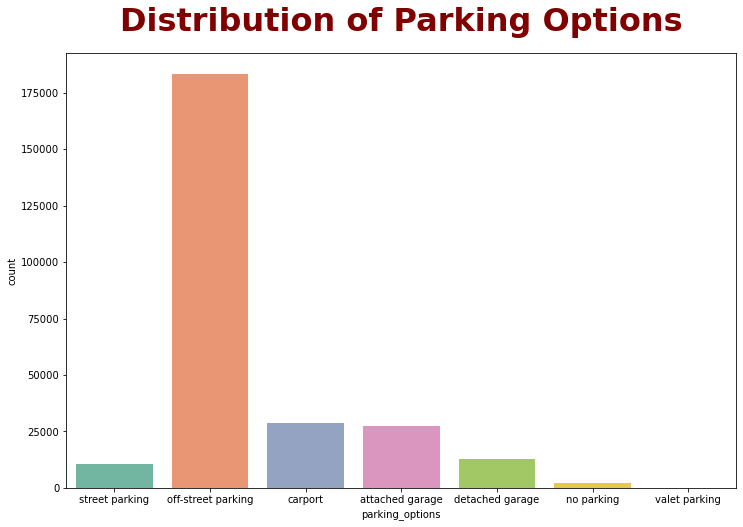

In [15]:
sns.countplot(df['parking_options'],palette='Set2')
plt.title('Distribution of Parking Options',fontsize=32,color='maroon',fontweight='bold',pad=22)

A significant proportion of the parking services have been offered in off-street parking mode. In addition, carport and attached garage parking options comprise a similar share as far as their usage is concerned across all the available houses. Furthermore, street parking and detached garage comprise a considerably lower share in comparison to carport. Additionally, no parking and valet parking account for a tiny fraction of the total share.

Text(0.5, 1.0, 'Distribution of various house types')

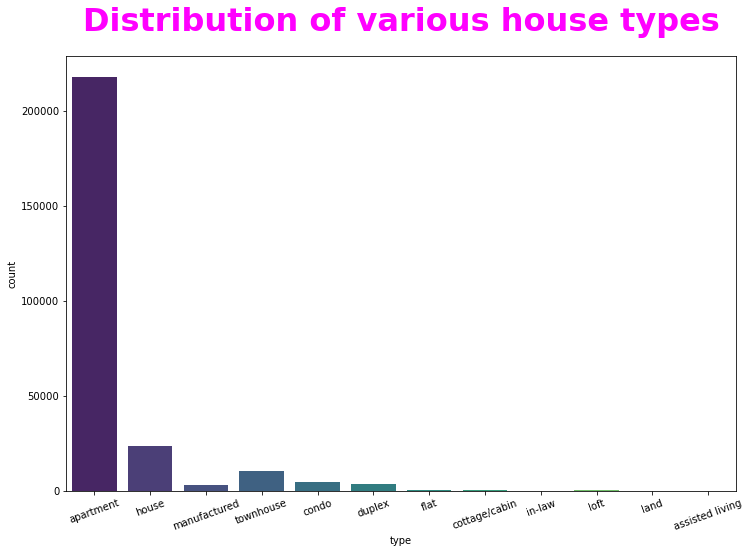

In [16]:
sns.countplot(df['type'],palette='viridis')
plt.xticks(rotation=20)
plt.title('Distribution of various house types',fontsize=32,fontweight='bold',color='fuchsia',pad=25)

A vast majority of the total number of houses in the dataset are apartments.

<AxesSubplot:xlabel='price', ylabel='Density'>

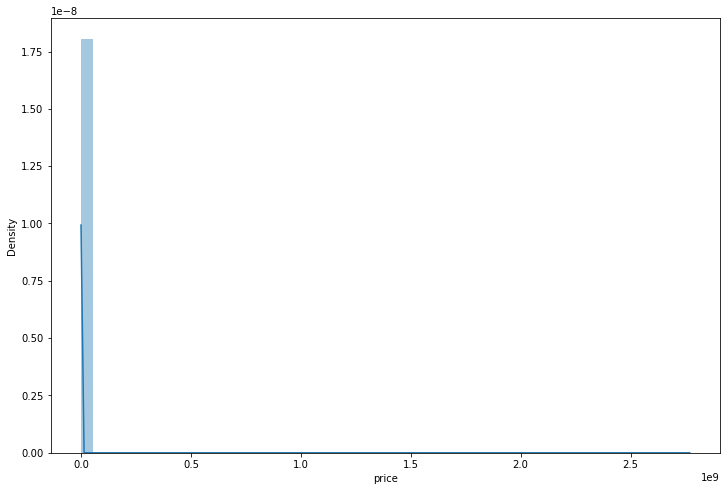

In [17]:
sns.distplot(df['price'])

The distribution of the target variable 'price' is substantially right skewed i.e. it has an enormous positive skew. 

<AxesSubplot:xlabel='lat', ylabel='Density'>

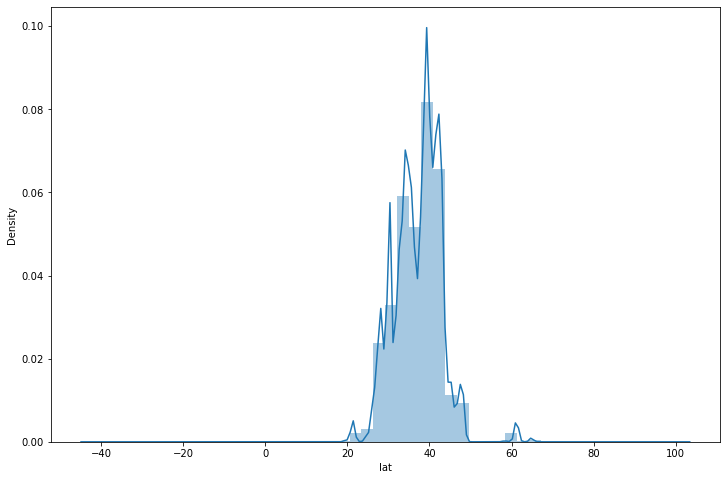

In [18]:
sns.distplot(df['lat'])

<AxesSubplot:xlabel='long', ylabel='Density'>

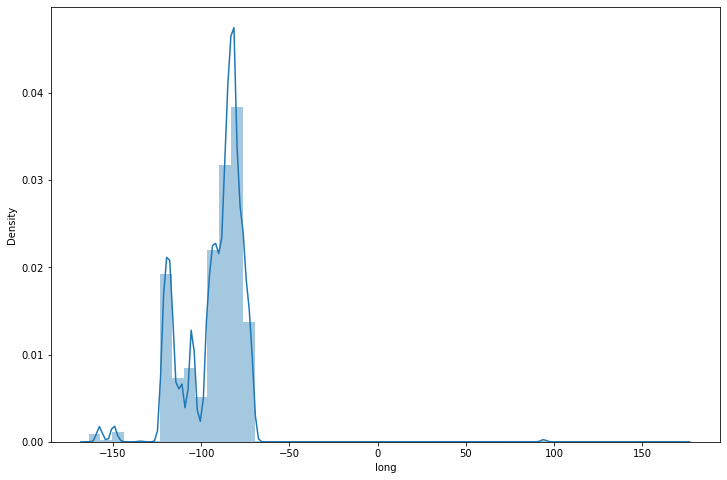

In [19]:
sns.distplot(df['long'])

Text(0.5, 1.0, 'Correlation Heatmap')

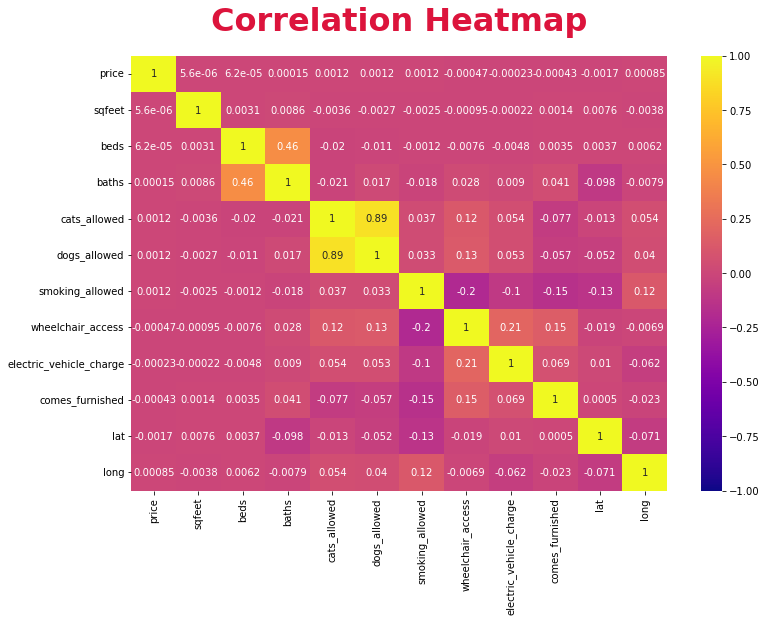

In [20]:
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)
plt.title('Correlation Heatmap',fontsize=32,fontweight='bold',color='crimson',pad=25)

In [21]:
# sns.pairplot(df)

## Outlier Detection and Elimination

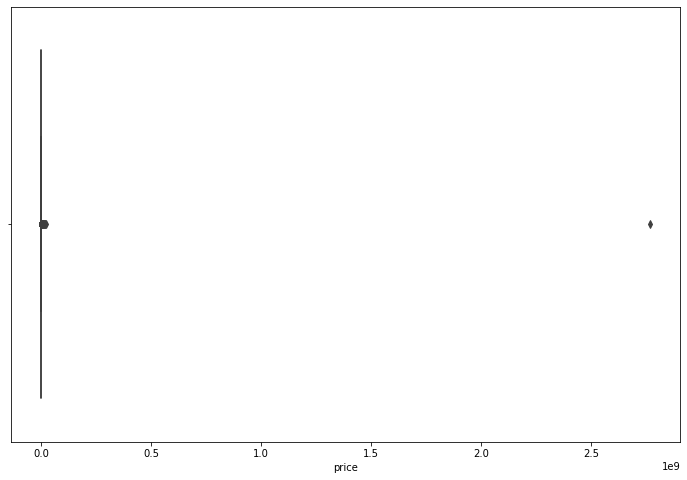

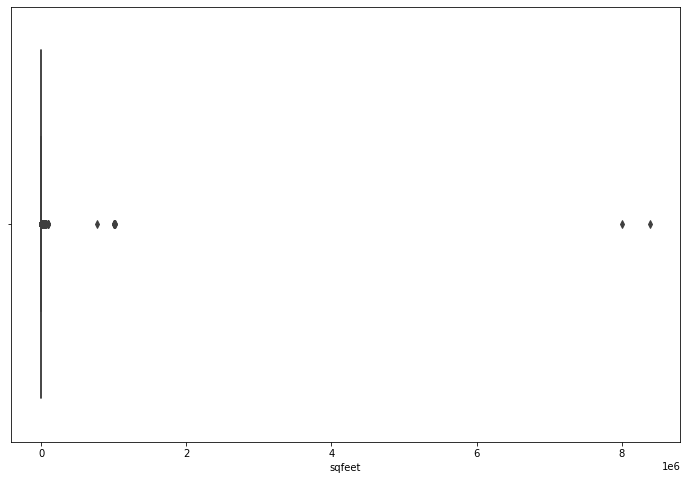

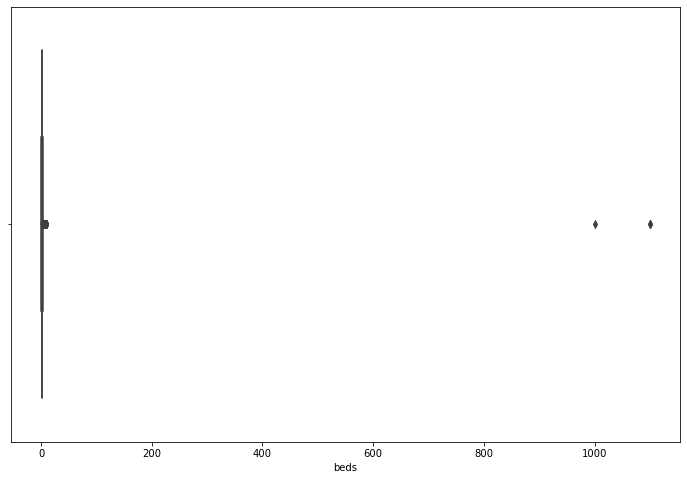

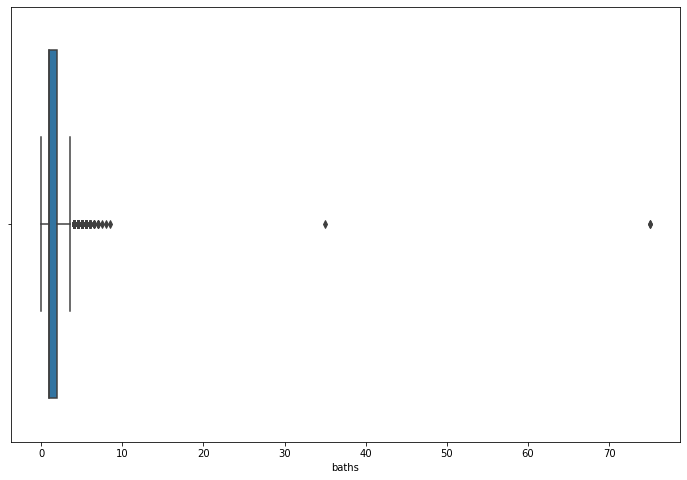

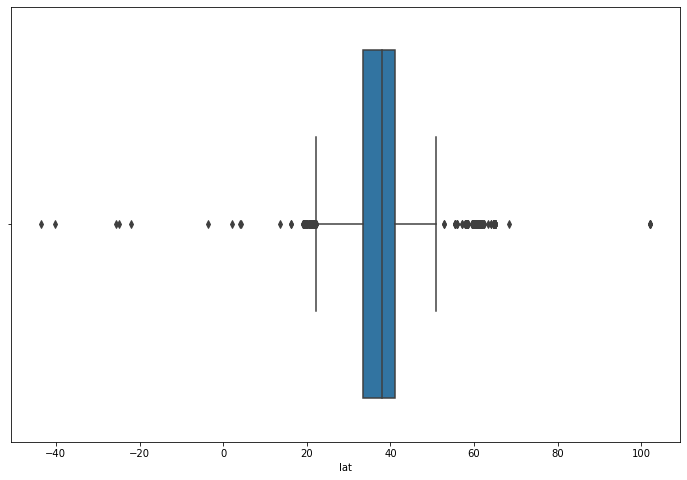

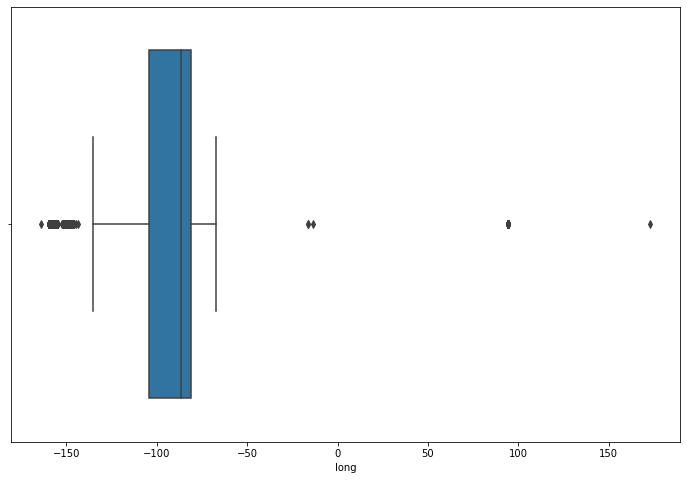

In [22]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if df[col].nunique() > 2:
            sns.boxplot(df[col])
            plt.show()

In [23]:
def remove_outliers(df,col):
    lower_limit = df[col].quantile(0.25)
    upper_limit = df[col].quantile(0.75)
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return lower_whisker, upper_whisker

In [24]:
# z_scores = stats.zscore(df)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df = df[filtered_entries]

In [25]:
for col in ['price','sqfeet','beds','baths']:
    whiskers = remove_outliers(df,col)
    df = df[(df[col]>whiskers[0]) & (df[col]<whiskers[1])]
df.shape

(238080, 17)

## Categorical Encoding using Label Encoder

In [31]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])
        df[col] = df[col].astype(int)

## Feature Scaling and Normalization along with division of the dataset into training and testing sets

In [32]:
X = df.drop('price',axis=1)
y = df.price
scaler = StandardScaler()
features = X.columns
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=features)
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.2,random_state=1)

## Model Training and Evaluation

### Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
lr.score(X_test,y_test)

0.23417530877282766

In [35]:
lr_pred = lr.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lr_pred)))
print("MAE:",mean_absolute_error(y_test,lr_pred))
print("MSE:",mean_squared_error(y_test,lr_pred))
print("R2 Score:",r2_score(y_test,lr_pred))

RMSE: 366.9223119272959
MAE: 281.98481930989556
MSE: 134631.98299007182
R2 Score: 0.23417530877282766


In [36]:
hr = HuberRegressor()
hr.fit(X_train,y_train)

HuberRegressor()

In [37]:
hr.score(X_test,y_test)

0.2209585106637162

In [38]:
hr_pred = hr.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,hr_pred)))
print("MAE:",mean_absolute_error(y_test,hr_pred))
print("MSE:",mean_squared_error(y_test,hr_pred))
print("R2 Score:",r2_score(y_test,hr_pred))

RMSE: 370.07498718080114
MAE: 277.69199694801785
MSE: 136955.49613687015
R2 Score: 0.2209585106637162


In [39]:
ard = ARDRegression()
ard.fit(X_train,y_train)

ARDRegression()

In [40]:
ard.score(X_test,y_test)

0.23417746235649683

In [41]:
ard_pred = ard.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,ard_pred)))
print("MAE:",mean_absolute_error(y_test,ard_pred))
print("MSE:",mean_squared_error(y_test,ard_pred))
print("R2 Score:",r2_score(y_test,ard_pred))

RMSE: 366.9217960138869
MAE: 281.9830135688049
MSE: 134631.6043900564
R2 Score: 0.23417746235649683


In [42]:
poison = PoissonRegressor()
poison.fit(X_train,y_train)

PoissonRegressor()

In [43]:
poison.score(X_test,y_test)

0.23144600862319764

In [44]:
poison_pred = poison.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,poison_pred)))
print("MAE:",mean_absolute_error(y_test,poison_pred))
print("MSE:",mean_squared_error(y_test,poison_pred))
print("R2 Score:",r2_score(y_test,poison_pred))

RMSE: 366.70093555836
MAE: 281.12978716727025
MSE: 134469.5761393765
R2 Score: 0.2350991247452633


In [45]:
ls = Lasso()
ls.fit(X_train,y_train)

Lasso()

In [46]:
ls.score(X_test,y_test)

0.2339411268507593

In [47]:
ls_pred = ls.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,ls_pred)))
print("MAE:",mean_absolute_error(y_test,ls_pred))
print("MSE:",mean_squared_error(y_test,ls_pred))
print("R2 Score:",r2_score(y_test,ls_pred))

RMSE: 366.97840831943546
MAE: 282.1847348452588
MSE: 134673.1521726663
R2 Score: 0.2339411268507593


In [48]:
tw = TweedieRegressor()
tw.fit(X_train,y_train)

TweedieRegressor()

In [49]:
tw.score(X_test,y_test)

0.17757105243917215

In [50]:
tw_pred = tw.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,tw_pred)))
print("MAE:",mean_absolute_error(y_test,tw_pred))
print("MSE:",mean_squared_error(y_test,tw_pred))
print("R2 Score:",r2_score(y_test,tw_pred))

RMSE: 380.24072825183146
MAE: 297.6402183796277
MSE: 144583.01142148313
R2 Score: 0.17757105243917215


In [51]:
ransac = RANSACRegressor()
ransac.fit(X_train,y_train)

RANSACRegressor()

In [52]:
ransac.score(X_test,y_test)

-0.5032552985526206

In [53]:
ransac_pred = ransac.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,ransac_pred)))
print("MAE:",mean_absolute_error(y_test,ransac_pred))
print("MSE:",mean_squared_error(y_test,ransac_pred))
print("R2 Score:",r2_score(y_test,ransac_pred))

RMSE: 514.0742027625685
MAE: 377.42638390832394
MSE: 264272.2859459704
R2 Score: -0.5032552985526206


In [54]:
xgb = XGBRegressor(n_estimators=500,learning_rate=0.2,gamma=0,min_child_weight=12,subsample=0.6,colsample_bytree=1,max_depth=8)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=12,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [55]:
xgb.score(X_test,y_test)

0.8905800398707664

In [56]:
xgb_pred = xgb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,xgb_pred)))
print("MAE:",mean_absolute_error(y_test,xgb_pred))
print("MSE:",mean_squared_error(y_test,xgb_pred))
print("R2 Score:",r2_score(y_test,xgb_pred))

RMSE: 138.69401326440624
MAE: 80.09395690026983
MSE: 19236.02931538729
R2 Score: 0.8905800398707664


In [57]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [58]:
dtree.score(X_test,y_test)

0.8354494482967373

In [59]:
dtree_pred = dtree.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,dtree_pred)))
print("MAE:",mean_absolute_error(y_test,dtree_pred))
print("MSE:",mean_squared_error(y_test,dtree_pred))
print("R2 Score:",r2_score(y_test,dtree_pred))

RMSE: 170.08229619123696
MAE: 67.61436984522972
MSE: 28927.98747768366
R2 Score: 0.8354494482967373


In [60]:
rfc = RandomForestRegressor()
rfc.fit(X_train.values,y_train.values)

RandomForestRegressor()

In [61]:
rfc.score(X_test.values,y_test.values)

0.9027701754162435

In [62]:
rfc_pred = rfc.predict(X_test.values)
print("RMSE:",np.sqrt(mean_squared_error(y_test,rfc_pred)))
print("MAE:",mean_absolute_error(y_test,rfc_pred))
print("MSE:",mean_squared_error(y_test,rfc_pred))
print("R2 Score:",r2_score(y_test,rfc_pred))

RMSE: 130.74021359291936
MAE: 59.28198425315992
MSE: 17093.003450322176
R2 Score: 0.9027701754162435


As is clearly evident from the performance of all used models, Random Forest Regressor had a superior performance, possessing an overall prediction accuracy of more than 90% which is quite impressive!

## Saving the Random Forest Regressor model for future use

In [63]:
joblib.dump(rfc,'model.pkl',compress=4)

['model.pkl']

In [64]:
model = joblib.load('model.pkl')
model

RandomForestRegressor()